**Modules**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

**Data Visualisation**

In [6]:
df_train = pd.read_csv('archive/train.csv')
df_test = pd.read_csv('archive/test.csv')

df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


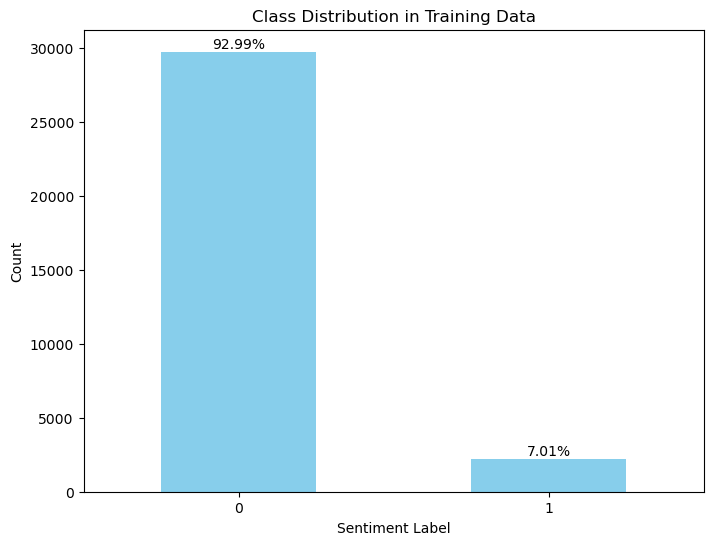

In [8]:
# Count the occurrences of each label
label_counts = df_train['label'].value_counts()

# Calculate the percentage of each class
total_samples = len(df_train)
label_percentages = (label_counts / total_samples) * 100

# Plotting the bar plot
plt.figure(figsize=(8, 6))
ax = label_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution in Training Data')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Annotate percentages on top of each bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.5,
            f'{i.get_height()/total_samples:.2%}', ha='center', va='bottom')

plt.show()

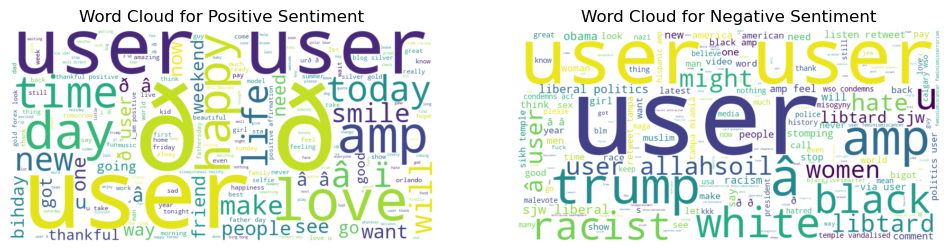

In [10]:
# Separate positive and negative sentiment tweets
positive_tweets = df_train[df_train['label'] == 0]['tweet']
negative_tweets = df_train[df_train['label'] == 1]['tweet']

# Generate word clouds for positive and negative sentiment tweets
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_tweets))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_tweets))

# Plot word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off')

plt.show()

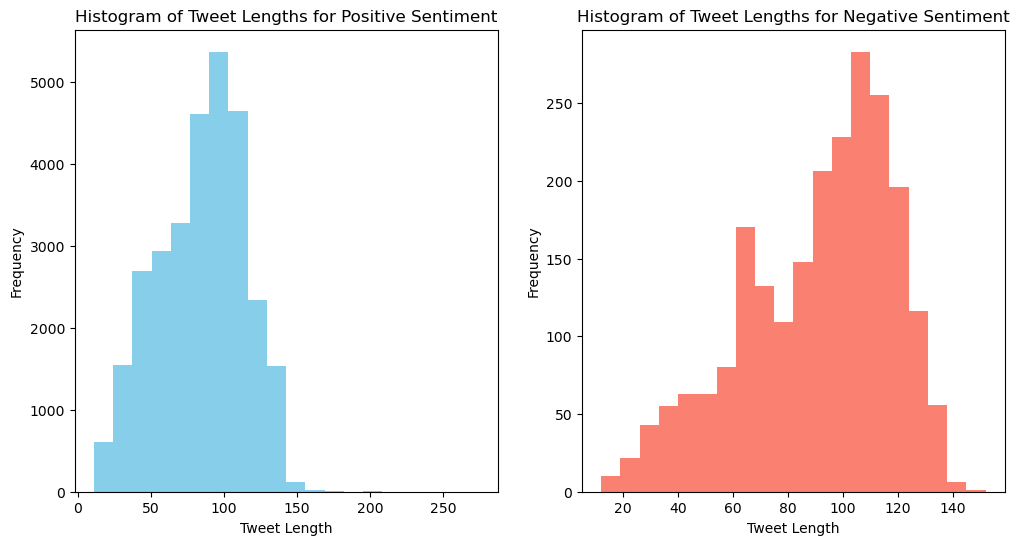

In [11]:
# Calculate tweet lengths for positive and negative sentiment tweets
positive_tweet_lengths = df_train[df_train['label'] == 0]['tweet'].apply(len)
negative_tweet_lengths = df_train[df_train['label'] == 1]['tweet'].apply(len)

# Plot histograms of tweet lengths
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(positive_tweet_lengths, color='skyblue', bins=20)
plt.title('Histogram of Tweet Lengths for Positive Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(negative_tweet_lengths, color='salmon', bins=20)
plt.title('Histogram of Tweet Lengths for Negative Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')

plt.show()

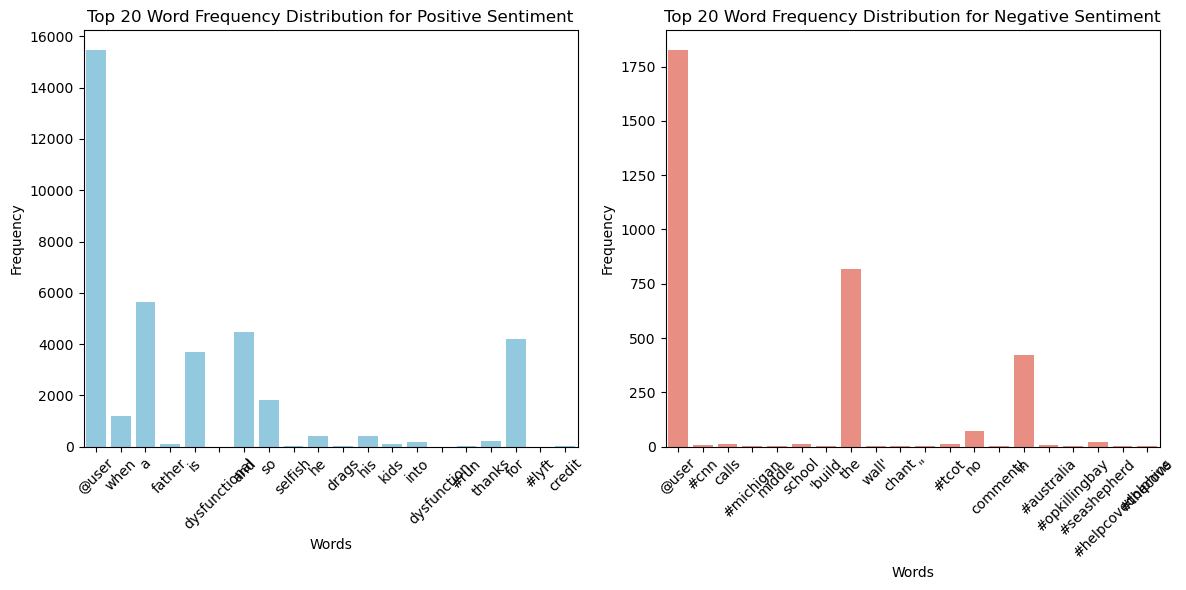

In [17]:
# Tokenize and count words for positive and negative sentiment tweets
positive_words = ' '.join(df_train[df_train['label'] == 0]['tweet']).split()
negative_words = ' '.join(df_train[df_train['label'] == 1]['tweet']).split()

# Count word frequencies
positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)

# Convert word frequencies to DataFrames
positive_word_freq_df = pd.DataFrame.from_dict(positive_word_freq, orient='index', columns=['Frequency'])
negative_word_freq_df = pd.DataFrame.from_dict(negative_word_freq, orient='index', columns=['Frequency'])

# Plot word frequency distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=positive_word_freq_df.index[:20], y=positive_word_freq_df['Frequency'][:20], color='skyblue')
plt.title('Top 20 Word Frequency Distribution for Positive Sentiment')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=negative_word_freq_df.index[:20], y=negative_word_freq_df['Frequency'][:20], color='salmon')
plt.title('Top 20 Word Frequency Distribution for Negative Sentiment')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Data Preprocessing**

In [18]:
# Convert uppercase letters to lowercase in the "tweet" column
df_train['tweet'] = df_train['tweet'].str.lower()
df_test['tweet'] = df_test['tweet'].str.lower()

In [20]:
# Function to remove punctuation from text
def remove_punctuation(text):
    # Define a regular expression pattern to match punctuation
    punctuation_pattern = r'[^\w\s]'  # Matches any character that is not a word character or whitespace
    
    # Replace punctuation with an empty string
    return re.sub(punctuation_pattern, '', text)

# Remove punctuation from the "tweet" column
df_train['tweet'] = df_train['tweet'].apply(remove_punctuation)
df_test['tweet'] = df_test['tweet'].apply(remove_punctuation)

In [22]:
# Download stopwords list
nltk.download('stopwords')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Function to remove numbers, stopwords from text
def clean_text(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    return text

# Remove numbers, stopwords, and punctuations from the "tweet" column
df_train['tweet'] = df_train['tweet'].apply(clean_text)
df_test['tweet'] = df_test['tweet'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/terlan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
# Drop the "id" column from the training dataset
df_train = df_train.drop("id", axis=1)

# Drop the "id" column from the testing dataset
df_test = df_test.drop("id", axis=1)

In [24]:
# Tokenize words in the "tweet" column
words = ' '.join(df_train['tweet']).split()

# Count the frequency of each word
word_counts = Counter(words)

# Print the most frequent words
print("Most frequent words:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

Most frequent words:
user: 17473
love: 2648
ð: 2516
day: 2230
â: 1867
happy: 1663
amp: 1588
u: 1141
im: 1139
time: 1110


In [25]:
# Function to remove specific characters and the word "user" from text
def clean_text(text):
    # Remove "user"
    text = text.replace('user', '')
    
    # Remove specific characters
    text = text.replace('ð', '')
    text = text.replace('â', '')
    
    return text

# Remove "user" and specific characters from the "tweet" column in the training dataset
df_train['tweet'] = df_train['tweet'].apply(clean_text)

# Remove "user" and specific characters from the "tweet" column in the testing dataset
df_test['tweet'] = df_test['tweet'].apply(clean_text)


In [27]:
#Creating series of least common words
freq = pd.Series(' '.join(df_train['tweet']).split()).value_counts()
least_common_words = freq.tail(10)

print("Least common 10 words:")
print(least_common_words)

Least common 10 words:
debby          1
junee          1
farels         1
waterbompik    1
evry           1
ravan          1
evr            1
desrved        1
babbar         1
chisolm        1
Name: count, dtype: int64
